# EXTRACTING DATA FOR UNSUPERVISED ML

In [1]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
import codecs
import os

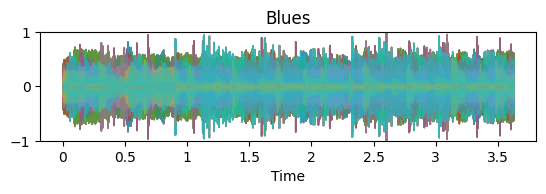

In [3]:


# load data

#dataset_path = "data_onset.json"
#sample_rate = 22050

#def load_data(dataset_path):
 #   with open(dataset_path, "r") as fp: # r for reading
  #      data = json.load(fp)
    
   # # convert lists into numpy array because labels and mfccs are lists
    #inputs = np.array(data["onset"])
    #targets = np.array(data["labels"])
    
    #return inputs
    
#blues_file = "Audio/onset/blues.00000.au"
#data, sr = librosa.load(blues_file, sr=22050, duration = 5.0)
#librosa.display.waveshow(data)

#durationSeconds = 0.5

#trimmed = librosa.util.fix_length(data, int(sr * durationSeconds))

data_list = []
pathAudio = "Audio/onset/"
files = librosa.util.find_files(pathAudio, ext=['au']) 
files = np.asarray(files)
for y in files: 
    data = librosa.load(y, sr = 16000, duration = 5.0, mono = True)
    data = data[0]
        #data_list.append(data.tolist())
        #print(data_list)
        #print(data.shape)
        #return data
        
    plt.subplot(3, 1, 3)
    librosa.display.waveshow(data, alpha=0.5) #alpha changes de color of the plot
    plt.title("Blues")
    plt.ylim(-1, 1) 

#def main():
    
    data_list = []
    pathAudio = "Audio/onset/"
    files = librosa.util.find_files(pathAudio, ext=['au']) 
    files = np.asarray(files)
    for y in files: 
        data = librosa.load(y, sr = 16000, duration = 5.0, mono = True)
        data = data[0]
        #data_list.append(data.tolist())
        #print(data_list)
        #print(data.shape)
        #return data
        
        #plt.subplot(3, 1, 3)
        librosa.display.waveshow(data, alpha=0.5) #alpha changes de color of the plot
        plt.title("Blues")
        plt.ylim(-1, 1) 
        
#main()

#plt.figure(figsize=(15, 17))

#plt.subplot(3, 1, 1)
#librosa.display.waveshow(blues, alpha=0.5) #alpha changes de color of the plot
#plt.title("Blues")
#plt.ylim(-1, 1) 

#plt.subplot(3, 1, 2) 
#librosa.display.waveshow(disco, alpha=0.5)
#plt.title("Disco")
#plt.ylim(-1, 1)

#plt.subplot(3, 1, 3)
#librosa.display.waveshow(jazz, alpha=0.5)
#plt.title("Jazz")
#plt.ylim(-1, 1)

#plt.show ()

In [7]:
dataset_path = "Audio/reduced_genres"    

onset = []

# loading and enumerating (indexing) all files in the dataset
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)): 
        
        # ensure that we're not at the root level
    if dirpath is not dataset_path:
            
        # save the semantic label
        #dirpath_components = dirpath.split("/") # genre/blues => ["genre", "blues"]
        #semantic_label = dirpath_components[-1]
        #data["mapping"].append(semantic_label)
            #print("\n Processing {}".format(semantic_label)) # to keep track of where we are when running script
            
            # process files fo a specific genre
        for f in filenames: 
                
                # load audio file
            file_path = os.path.join(dirpath, f)
            signal, sr = librosa.load(file_path, sr = sample_rate)
            
            onset_frames = librosa.onset.onset_detect(y = signal, 
                                                              delta=0.04, 
                                                              wait=4)
                    
                    # Convert the onsets from units of frames to seconds (and samples):
            onset_times = librosa.frames_to_time(onset_frames, sr=sample_rate)
            onset_samples = librosa.frames_to_samples(onset_frames)
                    #print(len(onset_samples)) # this is the first argument of the array for the K means
        
                    # store mfcc and labels for the segments that have the expected length
                    #if len(mfcc) == expected_num_mfcc_vectors_per_segment:
                        
                        # since librosa.mfcc generates a np.array, we need to create a list
                        # to save it on the json file
            onset.append(onset_samples.tolist())
            
            def extract_features(signal, sr):
                
                zcr = librosa.zero_crossings(x).sum()
                energy = scipy.linalg.norm(x)
                return [zcr, energy]

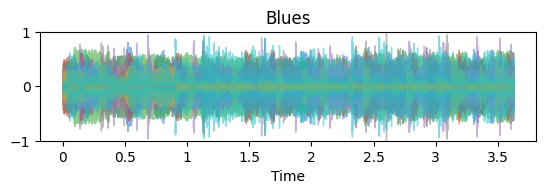

In [5]:
data_list = []
pathAudio = "Audio/onset/"
files = librosa.util.find_files(pathAudio, ext=['au']) 
files = np.asarray(files)
for y in files: 
    data = librosa.load(y, sr = 16000, duration = 5.0, mono = True)
    data = data[0]
        #data_list.append(data.tolist())
        #print(data_list)
        #print(data.shape)
        #return data
        
    plt.subplot(3, 1, 3)
    librosa.display.waveshow(data, alpha=0.5) #alpha changes de color of the plot
    plt.title("Blues")
    plt.ylim(-1, 1)

In [ ]:
# LOADING FILE